In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
%matplotlib inline 

In [2]:
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', 
                      usecols=['user_id', 'movie_id', 'user_emb_id', 'movie_emb_id', 'rating'])
max_userid = ratings['user_id'].drop_duplicates().max()
max_movieid = ratings['movie_id'].drop_duplicates().max()
ratings.head()

,user_id,movie_id,rating,user_emb_id,movie_emb_id
0,1,1193,5,0,1192
1,1,661,3,0,660
2,1,914,3,0,913
3,1,3408,4,0,3407
4,1,2355,5,0,2354


In [3]:
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', 
                     usecols=['movie_id', 'title', 'genres'])
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies=pd.merge(ratings,movies,on='movie_id')
movies.head()

,user_id,movie_id,rating,user_emb_id,movie_emb_id,title,genres
0,1,1193,5,0,1192,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,1,1192,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,11,1192,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,14,1192,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,16,1192,One Flew Over the Cuckoo's Nest (1975),Drama


In [5]:
trend=pd.DataFrame(movies.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(movies.groupby('title')['rating'].count()) 
trend.head()

,rating,total number of ratings
title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


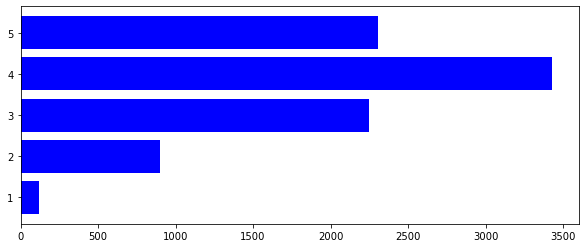

In [6]:
plt.figure(figsize =(10, 4))
ax=plt.barh(trend['rating'].round(),trend['total number of ratings'],color='b')
plt.show()

/var/folders/_s/g9sh0qnd1w18dk71zx1m7jq80000gn/T/ipykernel_94371/1464296253.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")


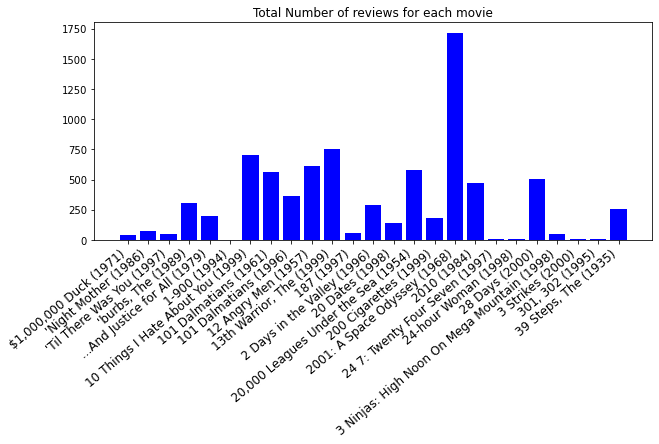

In [7]:
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(trend.head(25).index,trend['total number of ratings'].head(25),color='b')
ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

In [8]:
movies.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Ulysses (Ulisse) (1954)     5.0
Lured (1947)                5.0
Follow the Bitch (1998)     5.0
Bittersweet Motel (2000)    5.0
Song of Freedom (1936)      5.0
Name: rating, dtype: float64

In [9]:
sorted_movies = trend.sort_values(by=['rating', 'total number of ratings'], ascending=False)
top_10_movies = sorted_movies.head(10)
for index, row in top_10_movies.iterrows():
    movie_info = movies.loc[movies['title'] == index].iloc[0]
    movie_id = movie_info['movie_id']
    movie_rating = row['rating']
    movie_genres = movie_info['genres']
    print(f"Movie Name: {index}")
    print(f"Movie ID: {movie_id}")
    print(f"Rating: {movie_rating:.2f}")
    print(f"Genres: {movie_genres}")
    print("------------------------------")


Movie Name: Gate of Heavenly Peace, The (1995)
Movie ID: 787
Rating: 5.00
Genres: Documentary
------------------------------
Movie Name: Smashing Time (1967)
Movie ID: 3233
Rating: 5.00
Genres: Comedy
------------------------------
Movie Name: Baby, The (1973)
Movie ID: 3280
Rating: 5.00
Genres: Horror
------------------------------
Movie Name: Bittersweet Motel (2000)
Movie ID: 3881
Rating: 5.00
Genres: Documentary
------------------------------
Movie Name: Follow the Bitch (1998)
Movie ID: 1830
Rating: 5.00
Genres: Comedy
------------------------------
Movie Name: Lured (1947)
Movie ID: 3656
Rating: 5.00
Genres: Crime
------------------------------
Movie Name: One Little Indian (1973)
Movie ID: 3607
Rating: 5.00
Genres: Comedy|Drama|Western
------------------------------
Movie Name: Schlafes Bruder (Brother of Sleep) (1995)
Movie ID: 989
Rating: 5.00
Genres: Drama
------------------------------
Movie Name: Song of Freedom (1936)
Movie ID: 3382
Rating: 5.00
Genres: Drama
-------------